##Descarga  y descomprimido de archivos

In [ ]:
##OPCION 1 - Descarga directa desde Kaggle
import requests
file_id= '1-Hz9Wu4LUAHZPqS7CE4FtHx_DOvb1zHV'
url = f'https://drive.google.com/uc?id={file_id}'
response= requests.get(url)
open('kaggle.json', 'wb').write(response.content)

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

!unzip udea*.zip > /dev/null
!wc *.csv

 55% 11.0M/20.1M [00:00<00:00, 111MB/s]
100% 20.1M/20.1M [00:00<00:00, 141MB/s]
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


#Carga del archivo train.csv

In [30]:
#OPCION 2 - Descargar directamente desde Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Extraer el file ID del enlace de Google Drive
file_id = "114YfOz3i3wGl6Cz3s_v91eW0L0ErgyUV"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, 'train.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=114YfOz3i3wGl6Cz3s_v91eW0L0ErgyUV
From (redirected): https://drive.google.com/uc?id=114YfOz3i3wGl6Cz3s_v91eW0L0ErgyUV&confirm=t&uuid=65db3738-2830-4c62-8030-254b679e3a7c
To: /content/train.csv
100%|██████████| 144M/144M [00:01<00:00, 108MB/s]


'train.csv'

In [32]:
import pandas as pd

z = pd.read_csv("train.csv")
print("Tamaño del dataframe:", z.shape)
z.head()

Tamaño del dataframe: (692500, 21)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


##Exploraciones

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

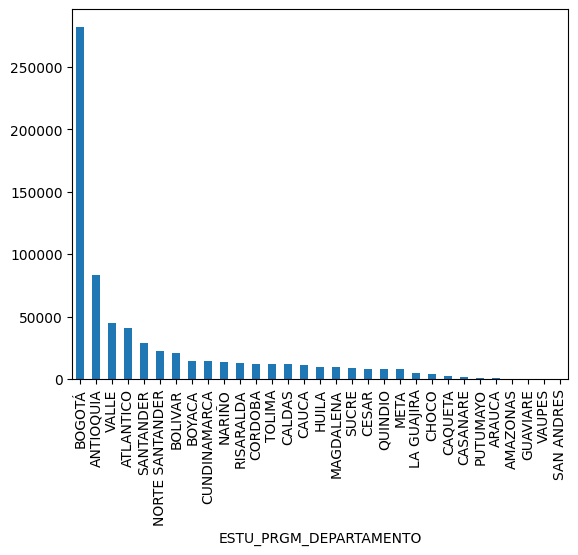

In [33]:
#Estudiantes por departamento
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

In [34]:
#Estudiantes de Bogotá
estu_bogota=z[z['ESTU_PRGM_DEPARTAMENTO']=='BOGOTÁ']
print("Tamaño del dataframe", estu_bogota.shape)
print("Hay ", len(estu_bogota), " estudiantes de Bogotá")
estu_bogota.head()
# Intentamos mostrar una gráfica según el programa académico
# pero debido a la gran cantidad de programas no se logra ver bien

Tamaño del dataframe (282159, 21)
Hay  282159  estudiantes de Bogotá


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
11,738026,20203,ADMINISTRACIÓN FINANCIERA,BOGOTÁ,Entre 500 mil y menos de 1 millón,Más de 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,No,Si,Si,Postgrado,medio-bajo,0.212,0.284,0.283,0.324
12,858669,20183,HOTELERIA Y TURISMO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.285,0.249,0.278,0.289


In [35]:
#Estudiantes de Bogotá que estudian enfermería
estu_bogota_enfermeria=estu_bogota[estu_bogota['ESTU_PRGM_ACADEMICO']=='ENFERMERÍA']
print("Tamaño del dataframe", estu_bogota_enfermeria.shape)
print("Hay ", len(estu_bogota_enfermeria), " estudiantes de Bogotá que estudian enfermería")
estu_bogota_enfermeria.head()

Tamaño del dataframe (61, 21)
Hay  61  estudiantes de Bogotá que estudian enfermería


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
10326,667023,20195,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,NaN,NaN,NaN,NaN,NaN,...,N,Si,NaN,NaN,NaN,medio-alto,0.043,0.026,0.006,0.036
14416,470625,20203,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Más de 30 horas,Estrato 3,Si,Educación profesional completa,Si,...,N,No,Si,Si,Educación profesional completa,medio-alto,0.305,0.239,0.289,0.250
19992,3123,20212,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Menos de 10 horas,Estrato 3,Si,Educación profesional completa,Si,...,N,No,Si,Si,Primaria incompleta,alto,0.304,0.211,0.302,0.294
26140,768594,20203,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Más de 30 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,No,Si,Si,Técnica o tecnológica completa,medio-alto,0.227,0.302,0.258,0.293
27744,485469,20195,ENFERMERÍA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,0,Estrato 3,Si,Técnica o tecnológica completa,Si,...,N,No,Si,Si,Educación profesional completa,medio-bajo,0.293,0.207,0.278,0.254


In [36]:
#Estudiantes de Antioquia que estudian medicina
estu_antioquia_medicina=z[(z['ESTU_PRGM_DEPARTAMENTO']=='ANTIOQUIA') & (z['ESTU_PRGM_ACADEMICO']=='MEDICINA')]
print("Tamaño del dataframe", estu_antioquia_medicina.shape)
print("Hay ", len(estu_antioquia_medicina), " estudiantes de Antioquia que estudian medicina")
estu_antioquia_medicina.head()


Tamaño del dataframe (1933, 21)
Hay  1933  estudiantes de Antioquia que estudian medicina


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
187,446151,20183,MEDICINA,ANTIOQUIA,Más de 7 millones,0,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Educación profesional completa,alto,0.553,0.118,0.261,0.190
318,730652,20212,MEDICINA,ANTIOQUIA,Más de 7 millones,0,Estrato 5,Si,Postgrado,Si,...,N,No,Si,Si,Postgrado,alto,0.545,0.126,0.226,0.173
351,725495,20195,MEDICINA,ANTIOQUIA,Menos de 500 mil,Menos de 10 horas,Estrato 2,Si,No Aplica,Si,...,N,No,Si,Si,Primaria incompleta,alto,0.235,0.273,0.275,0.316
1358,6501,20203,MEDICINA,ANTIOQUIA,No pagó matrícula,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.441,0.158,0.263,0.215
1611,711776,20212,MEDICINA,ANTIOQUIA,Más de 7 millones,0,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Técnica o tecnológica completa,medio-alto,0.570,0.116,0.250,0.148
